# Exercises - KNN Model


Create a new notebook, knn_model, and work with the titanic dataset to answer the following:

In [19]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import env

def get_connection(db, username=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

def get_titanic():
    my_query="SELECT * FROM passengers"
    titanic = pd.read_sql(my_query, get_connection('titanic_db'))
    return titanic

titanic = get_titanic()
titanic.head(2)


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [2]:
def prep_titanic(df):
    
    cols_to_drop = ['deck', 'embarked', 'class', 'age']
    titanic = df.drop(columns=cols_to_drop)
    dummy_titanic = pd.get_dummies(titanic[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
    titanic = pd.concat([titanic, dummy_titanic], axis=1)
    titanic.dropna()
    return titanic

In [3]:
titanic = prep_titanic(titanic)

In [4]:
cols_to_drop = ['sex', 'embark_town']
titanic = titanic.drop(columns=cols_to_drop)

In [5]:
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [6]:
train, val, test = train_val_test(titanic, 'survived')
train.shape, val.shape, test.shape

((623, 10), (134, 10), (134, 10))

In [7]:
X_train = train.drop(columns=['survived'])
y_train = train['survived']

X_val = val.drop(columns=['survived'])
y_val = val['survived']

X_test = test.drop(columns=['survived'])
y_test = test['survived']

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)        
tree1 = knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)

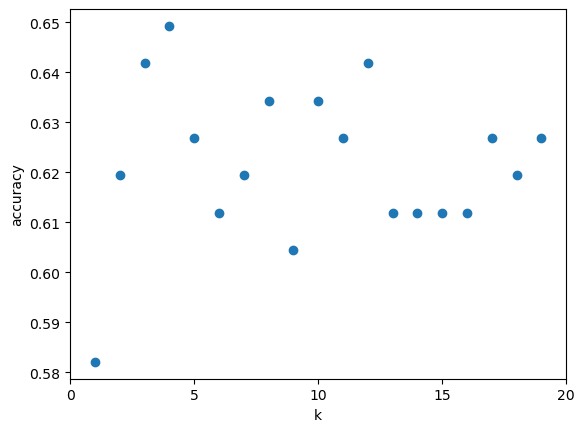

In [15]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()


2. Evaluate your results using the model score, confusion matrix, and classification report.

In [21]:
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report).T

Tree of 1 depth


,precision,recall,f1-score,support
0,0.743875,0.869792,0.801921,384.000000
1,0.712644,0.518828,0.600484,239.000000
accuracy,0.735152,0.735152,0.735152,0.735152
macro avg,0.728259,0.694310,0.701203,623.000000
weighted avg,0.731894,0.735152,0.724644,623.000000


In [9]:
knn.score(X_train, y_train)

0.7351524879614767

In [10]:
knn.score(X_val, y_val)

0.6492537313432836

In [11]:
print(confusion_matrix(y_train, y_pred))

[[334  50]
 [115 124]]


In [12]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       384
           1       0.71      0.52      0.60       239

    accuracy                           0.74       623
   macro avg       0.73      0.69      0.70       623
weighted avg       0.73      0.74      0.72       623



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [23]:
acc = tree1.score(X_train, y_train)
acc

0.7351524879614767

In [22]:
print('Accuracy of K Neighbors Classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of K Neighbors Classifier on training set: 0.74


In [25]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(334, 50, 115, 124)

In [26]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 384
Positive Cases: 239
0    384
1    239
Name: survived, dtype: int64


In [35]:
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
acc

0.7351524879614767

In [28]:
TPR = recall = TP/ (TP + FN)
TPR

0.5188284518828452

In [29]:
FPR = FP / (FP + TN)
FPR

0.13020833333333334

In [30]:
TNR = TN / (TN + FP)
TNR

0.8697916666666666

In [31]:
FNR = FN / (FN + TP)
FNR

0.4811715481171548

In [32]:
precision = TP / (TP + FP)
precision

0.7126436781609196

In [33]:
f1_score = 2 * (precision*recall) / (precision+recall)
f1_score

0.6004842615012107

In [34]:
support_pos = TP + FN
support_neg = FP + TN
support_pos, support_neg

(239, 384)

4. Run through steps 1-3 setting k to 10

In [36]:
knn = KNeighborsClassifier(n_neighbors=10)        
tree1 = knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)

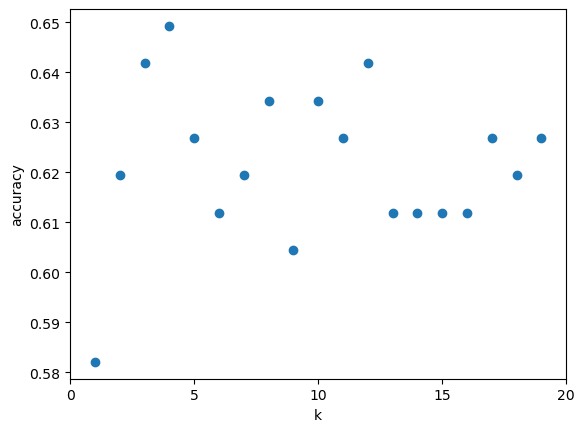

In [37]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [38]:
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report).T

Tree of 1 depth


,precision,recall,f1-score,support
0,0.693798,0.932292,0.795556,384.000000
1,0.757009,0.338912,0.468208,239.000000
accuracy,0.704655,0.704655,0.704655,0.704655
macro avg,0.725404,0.635602,0.631882,623.000000
weighted avg,0.718048,0.704655,0.669976,623.000000


In [39]:
knn.score(X_train, y_train)

0.6886035313001605

In [40]:
knn.score(X_val, y_val)

0.7089552238805971

In [41]:
print(confusion_matrix(y_train, y_pred))

[[358  26]
 [158  81]]


In [42]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.93      0.80       384
           1       0.76      0.34      0.47       239

    accuracy                           0.70       623
   macro avg       0.73      0.64      0.63       623
weighted avg       0.72      0.70      0.67       623



In [43]:
acc = tree1.score(X_train, y_train)
acc

0.7046548956661316

In [44]:
print('Accuracy of K Neighbors Classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of K Neighbors Classifier on training set: 0.70


In [45]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(358, 26, 158, 81)

In [46]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 384
Positive Cases: 239
0    384
1    239
Name: survived, dtype: int64


In [47]:
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL

TPR = recall = TP/ (TP + FN)

FPR = FP / (FP + TN)

TNR = TN / (TN + FP)

FNR = FN / (FN + TP)

precision = TP / (TP + FP)

f1_score = 2 * (precision*recall) / (precision+recall)

support_pos = TP + FN
support_neg = FP + TN

acc, TPR, FPR, TNR, precision, f1_score, support_pos, support_neg

(0.7046548956661316,
 0.3389121338912134,
 0.06770833333333333,
 0.9322916666666666,
 0.7570093457943925,
 0.4682080924855492,
 239,
 384)

5. Run through steps 1-3 setting k to 20

In [49]:
knn = KNeighborsClassifier(n_neighbors=20)        
tree1 = knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)

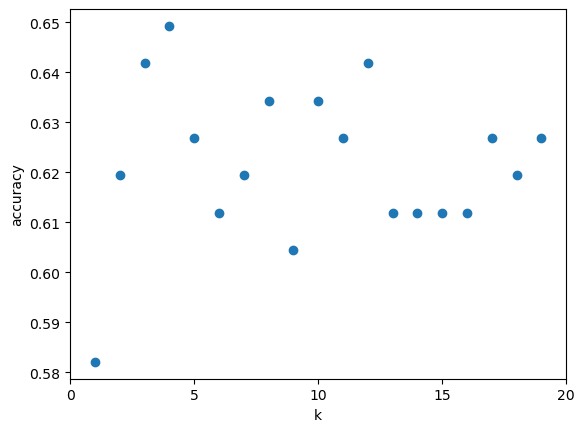

In [50]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

In [51]:
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report).T

Tree of 1 depth


,precision,recall,f1-score,support
0,0.671533,0.958333,0.789700,384.000000
1,0.786667,0.246862,0.375796,239.000000
accuracy,0.685393,0.685393,0.685393,0.685393
macro avg,0.729100,0.602598,0.582748,623.000000
weighted avg,0.715701,0.685393,0.630915,623.000000


In [52]:
knn.score(X_train, y_train)

0.6886035313001605

In [ ]:
knn.score(X_val, y_val)

In [53]:
print(confusion_matrix(y_train, y_pred))

[[368  16]
 [180  59]]


In [54]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79       384
           1       0.79      0.25      0.38       239

    accuracy                           0.69       623
   macro avg       0.73      0.60      0.58       623
weighted avg       0.72      0.69      0.63       623



In [55]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(368, 16, 180, 59)

In [56]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 384
Positive Cases: 239
0    384
1    239
Name: survived, dtype: int64


In [57]:
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL

TPR = recall = TP/ (TP + FN)

FPR = FP / (FP + TN)

TNR = TN / (TN + FP)

FNR = FN / (FN + TP)

precision = TP / (TP + FP)

f1_score = 2 * (precision*recall) / (precision+recall)

support_pos = TP + FN
support_neg = FP + TN

acc, TPR, FPR, TNR, precision, f1_score, support_pos, support_neg

(0.6853932584269663,
 0.24686192468619247,
 0.041666666666666664,
 0.9583333333333334,
 0.7866666666666666,
 0.375796178343949,
 239,
 384)

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [60]:
for i in range(1, 21):
    
    trees = KNeighborsClassifier(n_neighbors=i)

    trees = trees.fit(X_train, y_train)

    y_pred = trees.predict(X_train)

    report = classification_report(y_train, y_pred, output_dict=True)
    print(f"Tree with n_neighbors of {i}")
    print(pd.DataFrame(report))
    print()

Tree with n_neighbors of 1
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    384.0  239.0       1.0      623.0         623.0

Tree with n_neighbors of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.744186    1.000000  0.788122    0.872093      0.842323
recall       1.000000    0.447699  0.788122    0.723849      0.788122
f1-score     0.853333    0.618497  0.788122    0.735915      0.763244
support    384.000000  239.000000  0.788122  623.000000    623.000000

Tree with n_neighbors of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.800481    0.753623  0.784912    0.777052      0.782505
recall       0.867188    0.652720  0.784912    0.759954      0.784912
f1-score     0.832500    0.699552  0.784912    0.766026      0

Trees with n_neighbors of two or three appears to have the best accuracy, but may not make them the best model. Based on the information above the model with neighbors of 2-3 have the highest accuracy.

7. Which model performs best on our out-of-sample data from validate?

In [61]:
metrics = []

for i in range(1, 25):
    tree = KNeighborsClassifier(n_neighbors=i)

    tree = tree.fit(X_train, y_train)

    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_val, y_val)

    output = {
        "n_neighbors": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,n_neighbors,train_accuracy,validate_accuracy,difference
0,1,1.000000,0.671642,0.328358
1,2,0.788122,0.649254,0.138868
2,3,0.784912,0.641791,0.143121
3,4,0.739968,0.649254,0.090714
4,5,0.735152,0.649254,0.085899
5,6,0.717496,0.641791,0.075705
6,7,0.725522,0.641791,0.083731
7,8,0.711075,0.671642,0.039434
8,9,0.703050,0.671642,0.031408
9,10,0.704655,0.686567,0.018088


Models with n_neighbors of 17 or 21 have the highest accuracy but the model with n_neighbor of 12 has the best differential and may be the best model.

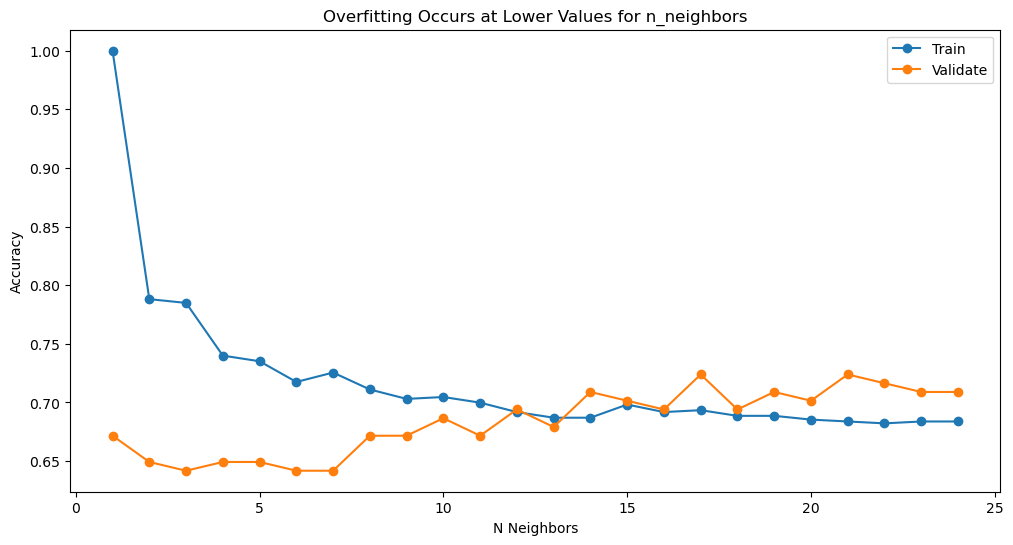

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df.n_neighbors, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.n_neighbors, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Lower Values for n_neighbors')
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()